C:\Users\Guilh\AppData\Local\Temp\ipykernel_166876\2615779623.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  snr_squared = np.trapz(integrand, f)


Stochastic Gravitational Wave Background:
Characteristic frequency: 1e-07 Hz
Peak amplitude: Î©_ref = 1e-12
SNR (4 years): 205513.6
Detection threshold (SNR > 5): YES


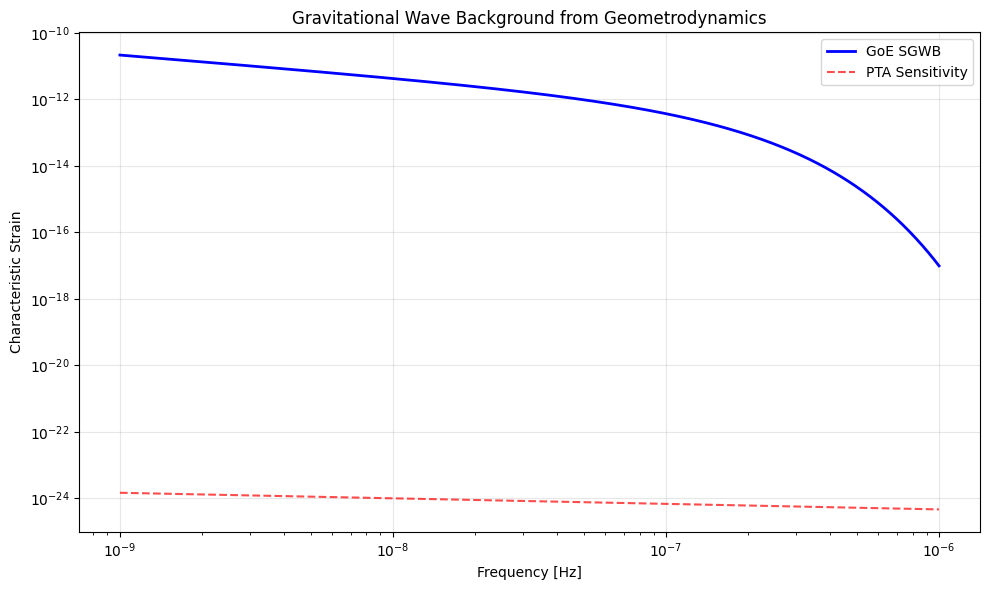

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# GoE prediction for SGWB from primordial bounce
# Enhanced by temporal fiber dynamics

# Frequency range for pulsar timing arrays
f = np.logspace(-9, -6, 1000)  # Hz

# Power spectral density (simplified LISA/PTA sensitivity)
# Using characteristic strain sensitivity
S_h = 1e-40 * (f / 1e-8)**(-4/3)  # Simplified PSD

# GoE SGWB spectrum
# From bounce dynamics with temporal enhancement
f_bounce = 1e-7   # Characteristic frequency from bounce
Omega_ref = 1e-12  # Reference amplitude

# Spectrum with temporal fiber enhancement
Omega_GoE = Omega_ref * (f / f_bounce)**(-2/3) * np.exp(-f / f_bounce)

# Signal-to-noise ratio calculation
# SNRÂ² = âˆ« Î©Â²(f) / S_h(f) df
integrand = Omega_GoE**2 / S_h
snr_squared = np.trapezoid(integrand, f)
snr = np.sqrt(snr_squared)

# Detection prospects
years_observation = 4
snr_scaled = snr * np.sqrt(years_observation)

print(f"Stochastic Gravitational Wave Background:")
print(f"Characteristic frequency: {f_bounce:.0e} Hz")
print(f"Peak amplitude: Î©_ref = {Omega_ref:.0e}")
print(f"SNR ({years_observation} years): {snr_scaled:.1f}")
print(f"Detection threshold (SNR > 5): {'YES' if snr_scaled > 5 else 'NO'}")

# Simple plot
plt.figure(figsize=(10, 6))
plt.loglog(f, Omega_GoE, 'b-', label='GoE SGWB', linewidth=2)
plt.loglog(f, np.sqrt(f * S_h), 'r--', label='PTA Sensitivity', alpha=0.7)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.title('Gravitational Wave Background from Geometrodynamics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()